<a href="https://colab.research.google.com/github/suyangegrong/pdm08/blob/main/notebook/chap08_DNN_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNN with Keras

## MSE vs BCE
- mean squared error
- binary cross-entropy

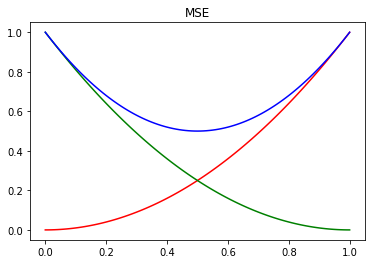

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


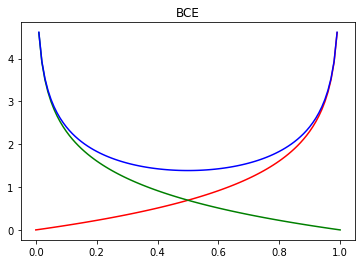

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# MSE
# mse(y,y_hat) = (y - y_hat)**2
#
x = np.linspace(0.0, 1.0, 101) 
y0 = np.square(x)
y1 = np.square(1-x)
plt.plot(x, y0, 'r') 
plt.plot(x, y1, 'g') 
plt.plot(x, y0+y1, 'b') 
plt.title('MSE')
plt.show() 

# BCE
# bce(y,y_hat) = - y log(y_hat) - (1-y) log(1-y_hat)
#
x = np.linspace(0.0, 1.0, 101) 
y0 = -np.log(1-x)
y1 = -np.log(x)
plt.plot(x, y0, 'r') 
plt.plot(x, y1, 'g') 
plt.plot(x, y0+y1, 'b') 
plt.title('BCE')
plt.show() 


## cross-entropy
- BinaryCrossentropy
- CategoricalCrossentropy
- SparseCategoricalCrossentropy

In [ ]:
# import numpy as np
import tensorflow as tf

y_true = [  [1],   [0],   [0],   [1]]  
y_pred = [[0.9], [0.1], [0.2], [0.9]]   
bce = tf.keras.losses.BinaryCrossentropy()
print(bce(y_true, y_pred).numpy())
      
# CategoricalCrossentropy, 3 classes, one hot encoding O
y_true = [[0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0]] # 고양이, 호랑이, 강아지
y_pred = [[0.1, 0.8, 0.1], [0.2, 0.1, 0.7], [0.8, 0.1, 0.1]]
cce = tf.keras.losses.CategoricalCrossentropy ()
print(cce(y_true, y_pred).numpy ())    

# SparseCategoricalCrossentropy, 3 classes, one hot encoding X
y_true = [[1], [2], [0]] # 고양이, 호랑이, 강아지
y_pred = [[0.1, 0.8, 0.1], [0.2, 0.1, 0.7], [0.8, 0.1, 0.1]]
cce = tf.keras.losses.SparseCategoricalCrossentropy ()
print(cce(y_true, y_pred).numpy ())    

y_true = [ 12 , 20 , 29 , 60 ]
y_pred = [ 14 , 18 , 27 , 55 ]
mse = tf.keras.losses.MeanSquaredError ()
print(mse(y_true, y_pred).numpy())

#########################################
def  custom_loss_function (y_true, y_pred) :
   squared_difference = tf.square (y_true-y_pred)
   return tf.reduce_mean (squared_difference, axis = -1 )

0.13480616
0.26765403
0.26765403
9


## int-encoding

In [ ]:
import numpy as np
X = np.array([['Korea', 44, 7200], 
		['Japan', 27, 4800], 
		['China', 30, 6100]])

from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

# 원하는 열을 뽑아서 2차원 배열로 만들어서 전달하여야 한다. 
XX = labelEncoder.fit_transform(X[:,0].reshape(-1,1))
print(XX) # [2,1,0] => 나라 알파벳 순서

X = np.delete(X, [0], axis=1)		# 0번째 열 삭제
X = np.concatenate((XX.reshape(-1,1), X), axis = 1)	# X와 XX를 붙인다. 
print(X)

[2 1 0]
[['2' '44' '7200']
 ['1' '27' '4800']
 ['0' '30' '6100']]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## one-hot encoding

In [ ]:
class_vector =[2, 6, 6, 1]
  
from tensorflow.keras.utils import to_categorical
output = to_categorical(class_vector, num_classes = 7, dtype ="int32")
print(output)

#
# mnist data
#
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train.shape,y_train.shape)

y_train[:10]

y_train_one_hot = to_categorical(y_train, num_classes = 10, dtype ="int32")
y_train_one_hot.shape
y_train_one_hot[:10]

# dtype ="int32"는 실수 말고 정수로 출력하는 것

[[0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0]]
11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=int32)

## Scaler
- MinMaxScaler
- StandardScaler

In [ ]:
# MinMaxScaler() 최소0, 최대1로 바꿔줌
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

scaler = MinMaxScaler() 
scaler.fit(data)		# 최대값과 최소값을 알아낸다. 
print(scaler.transform(data))	# 데이터를 변환한다. 



# StandardScaler() 평균값0을 기준으로 정규화
from sklearn.preprocessing import StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
# data = [[-1, 2, 7], [-0.5, 6, 3], [0, 10, -2], [1, 18, 6]]

scaler = StandardScaler()
scaler.fit(data)		# 평균=0, 분산=std 로 데이터 변경
print(scaler.transform(data))	# 데이터를 변환한다. 

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]
[[-1.18321596 -1.18321596]
 [-0.50709255 -0.50709255]
 [ 0.16903085  0.16903085]
 [ 1.52127766  1.52127766]]


## Nomalization Layer

In [ ]:
import numpy as np
from  tensorflow.keras.layers.experimental.preprocessing import Normalization

input_data = np.array([[1.], [2.], [3.]], np.float32)
layer = Normalization()
print(layer(input_data))

#
adapt_data = np.array([[1.], [2.], [3.], [4.], [5.]], dtype=np.float32)
input_data = np.array([[1.], [2.], [3.]], np.float32)
layer = Normalization()
layer.adapt(adapt_data)
print(layer(input_data))

tf.Tensor(
[[1.]
 [2.]
 [3.]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[-1.4142135 ]
 [-0.70710677]
 [ 0.        ]], shape=(3, 1), dtype=float32)


## IMDB 영화평 학습

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
49/49 [==============================] - 1s 14ms/step - loss: 0.5862 - accuracy: 0.7121 - val_loss: 0.4500 - val_accuracy: 0.8150
Epoch 2/20
49/49 [==============================] - 0s 9ms/step - loss: 0.3788 - accuracy: 0.8434 - val_loss: 0.3501 - val_accuracy: 0.8532
Epoch 3/20
49/49 [==============================] - 0s 9ms/step - loss: 0.3239 - accuracy: 0.8663 - val_loss: 0.3321 - val_accuracy: 0.8605
Epoch 4/20
49/49 [==============================] - 0s 9ms/step - loss: 0.3101 - accuracy: 0.8727 - val_loss: 0.3289 - val_accuracy: 0.8603
Epoch 5/20
49/49 [==============================] - 0s 9ms/step - loss: 0.3027 - accuracy: 0.8756 - val_loss: 0.3283 - val_accuracy: 0.8602
Epoch 6/20
49/49 [==============================] - 0s 9ms/step - loss: 0.2972 - accuracy: 0.8778 - val_loss: 0.3293 - val_accuracy: 0.8599
Epoch 7/20
49/49 [==============================] - 0s 9ms/step - loss: 0.2935 - accuracy: 0.8

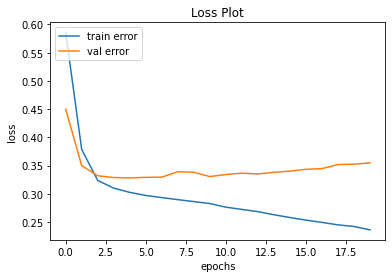

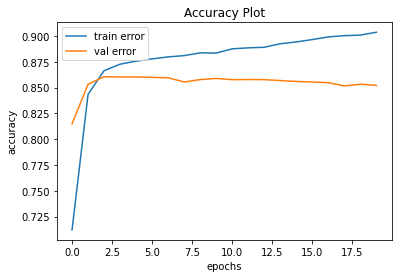

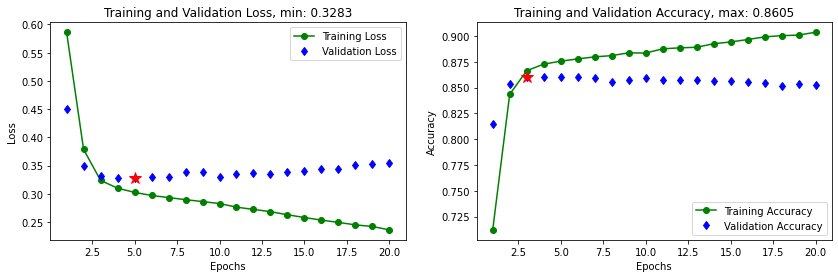

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data(num_words=1000)
len(train_data[0]),np.unique(train_data[0]).size # 첫번째 감상평은 218개의 단어, 중복 단어를 제외한 97단어로 이루어짐
max(train_data.max())
train_data.shape,train_labels.shape

# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = np.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

train_data.shape,test_data.shape
# train_data[0]

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=1)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = history.history
loss_values = history_dict['loss']		# 훈련 데이터 손실값
val_loss_values = history_dict['val_loss']	# 검증 데이터 손실값
acc = history_dict['accuracy']			# 정확도
epochs = range(1, len(acc) + 1)		# 에포크 수

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## IMDB 영화평 
- L2 규제
- Dropout

Epoch 1/20
49/49 - 2s - loss: 0.6016 - accuracy: 0.7318 - val_loss: 0.4600 - val_accuracy: 0.8285 - 2s/epoch - 32ms/step
Epoch 2/20
49/49 - 1s - loss: 0.4064 - accuracy: 0.8503 - val_loss: 0.3917 - val_accuracy: 0.8532 - 671ms/epoch - 14ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3646 - accuracy: 0.8679 - val_loss: 0.3735 - val_accuracy: 0.8613 - 456ms/epoch - 9ms/step
Epoch 4/20
49/49 - 1s - loss: 0.3531 - accuracy: 0.8718 - val_loss: 0.3681 - val_accuracy: 0.8621 - 684ms/epoch - 14ms/step
Epoch 5/20
49/49 - 1s - loss: 0.3458 - accuracy: 0.8724 - val_loss: 0.3691 - val_accuracy: 0.8605 - 621ms/epoch - 13ms/step
Epoch 6/20
49/49 - 1s - loss: 0.3411 - accuracy: 0.8748 - val_loss: 0.3670 - val_accuracy: 0.8590 - 568ms/epoch - 12ms/step
Epoch 7/20
49/49 - 1s - loss: 0.3375 - accuracy: 0.8753 - val_loss: 0.3645 - val_accuracy: 0.8594 - 668ms/epoch - 14ms/step
Epoch 8/20
49/49 - 1s - loss: 0.3355 - accuracy: 0.8770 - val_loss: 0.3647 - val_accuracy: 0.8591 - 727ms/epoch - 15ms/step
Epoch 9/20
4

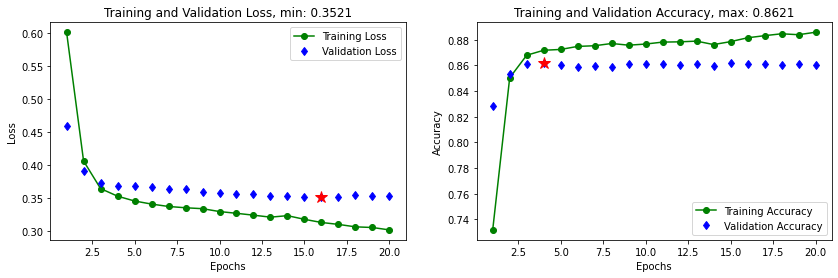

In [ ]:
##
# L2규제
##
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data( num_words=1000)

# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, 
	kernel_regularizer=tf.keras.regularizers.l2(0.001),  
	activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16,		 
	kernel_regularizer=tf.keras.regularizers.l2(0.001),  activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/20
49/49 - 1s - loss: 0.6798 - accuracy: 0.5496 - val_loss: 0.6132 - val_accuracy: 0.7343 - 1s/epoch - 23ms/step
Epoch 2/20
49/49 - 0s - loss: 0.5900 - accuracy: 0.6795 - val_loss: 0.4838 - val_accuracy: 0.8054 - 387ms/epoch - 8ms/step
Epoch 3/20
49/49 - 0s - loss: 0.5070 - accuracy: 0.7547 - val_loss: 0.4002 - val_accuracy: 0.8397 - 347ms/epoch - 7ms/step
Epoch 4/20
49/49 - 0s - loss: 0.4506 - accuracy: 0.8022 - val_loss: 0.3579 - val_accuracy: 0.8484 - 408ms/epoch - 8ms/step
Epoch 5/20
49/49 - 0s - loss: 0.4155 - accuracy: 0.8232 - val_loss: 0.3405 - val_accuracy: 0.8529 - 365ms/epoch - 7ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3931 - accuracy: 0.8391 - val_loss: 0.3283 - val_accuracy: 0.8585 - 392ms/epoch - 8ms/step
Epoch 7/20
49/49 - 0s - loss: 0.3770 - accuracy: 0.8480 - val_loss: 0.3257 - val_accuracy: 0.8595 - 404ms/epoch - 8ms/step
Epoch 8/20
49/49 - 0s - loss: 0.3653 - accuracy: 0.8559 - val_loss: 0.3225 - val_accuracy: 0.8620 - 405ms/epoch - 8ms/step
Epoch 9/20
49/49 -

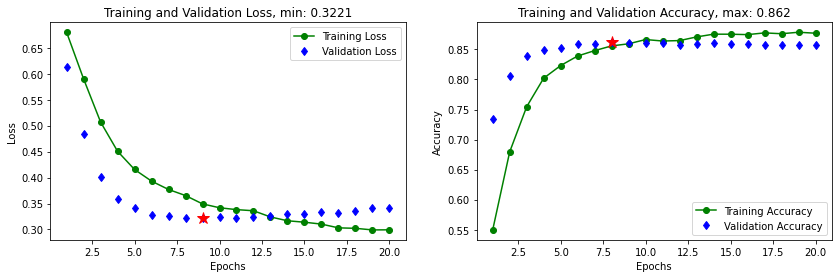

In [ ]:
##
# Dropout
##
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data( num_words=1000)

# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## MNIST : DNN

(60000, 28, 28) (60000,)
Epoch 1/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2188 - accuracy: 0.9365 - val_loss: 0.1068 - val_accuracy: 0.9675
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0970 - accuracy: 0.9693 - val_loss: 0.0815 - val_accuracy: 0.9760
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0686 - accuracy: 0.9781 - val_loss: 0.0684 - val_accuracy: 0.9785
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0516 - accuracy: 0.9836 - val_loss: 0.0686 - val_accuracy: 0.9798
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0441 - accuracy: 0.9849 - val_loss: 0.0647 - val_accuracy: 0.9805
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0363 - accuracy: 0.9884 - val_loss: 0.0693 - val_accuracy: 0.9807
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0308 - accuracy: 0.9895 - 

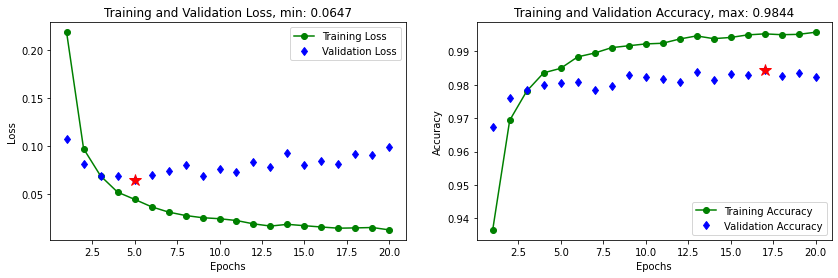

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape,y_train.shape)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, 
          epochs=20,
          validation_data=(x_test, y_test),
          verbose=1)

model.evaluate(x_test, y_test)

#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Example 
- Classification fashion item
- Titanic survival prediction

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
[9 0 0 3 0 2 7 2 5 5]
Epoch 1/25
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4987 - accuracy: 0.8241 - val_loss: 0.4311 - val_accuracy: 0.8451
Epoch 2/25
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3789 - accuracy: 0.8616 - val_loss: 0.3996 - val_accuracy: 0.8555
Epoch 3/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3390 - accuracy: 0.8757 - val_loss: 0.3701 - val_accuracy: 0.8690
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3117 - accuracy: 0.8859 - val_loss: 0.3591 - val_accuracy: 0.8713
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2948 - accuracy: 0.8924 - val_loss: 0.3813 - val_accuracy: 0.8635
Epoch 6/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2818 - accuracy: 0.8961 - val_loss: 0.3460 - val_accuracy: 0.8741
Epoch 7/25
1875/1875 [

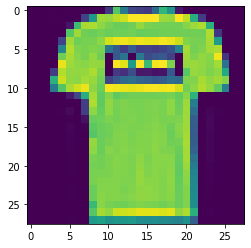

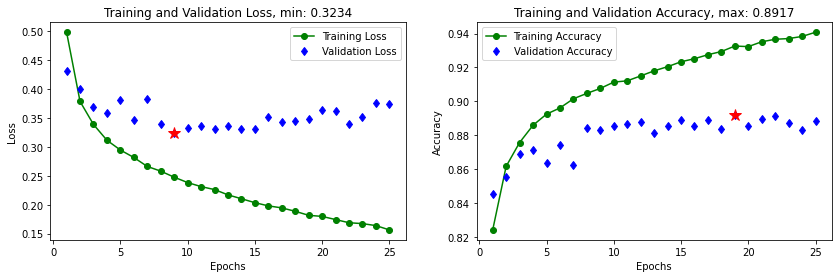

In [ ]:
# Classification fashion item

# import tensorflow as tf
# from tensorflow import keras
# import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape,train_labels.shape)
print(train_labels[:10])

plt.imshow(train_images[1])

train_images = train_images / 255.0
test_images = test_images / 255.0

# Model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28))) # 1차원 벡터로 바꿈 (784,)
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
          epochs=25,
          validation_data=(test_images, test_labels),
          verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('정확도:', test_acc)

#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Titanic survival prediction

import numpy as np
import pandas as pd
import tensorflow as tf

# 데이터 세트를 읽어들인다. 
train = pd.read_csv("train.csv", sep=',')
test = pd.read_csv("test.csv", sep=',')

# print(train.shape)

# 필요없는 컬럼을 삭제한다. 
train.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name',\
        'Cabin', 'PassengerId', 'Fare', 'Age'], inplace=True, axis=1)
    
# print(train.shape)
# train.head()
train.isna().sum()
train.duplicated().sum()

# 결손치가 있는 데이터 행은 삭제한다. 
train.dropna(inplace=True)

# 기호를 수치로 변환한다. 
for ix in train.index:
    if train.loc[ix, 'Sex']=="male":
       train.loc[ix, 'Sex']=1 
    else:
       train.loc[ix, 'Sex']=0 

# 2차원 배열을 1차원 배열로 평탄화한다. 
target = np.ravel(train.Survived) 

# 생존여부를 학습 데이터에서 삭제한다. 
train.drop(['Survived'], inplace=True, axis=1)
train = train.astype(float)     # 최근 소스에서는 float형태로 형변환하여야 

# 케라스 모델을 생성한다. 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# 케라스 모델을 컴파일한다. 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# 케라스 모델을 학습시킨다. 
model.fit(train, target, epochs=30, batch_size=1, verbose=1)

######################################
# 훈련시킨 모델을 테스트 데이터에 적용 : 생사 예측
######################################
# test model
# 필요없는 컬럼을 삭제한다. 
test.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name',\
        'Cabin', 'PassengerId', 'Fare', 'Age'], inplace=True, axis=1)

test.isna().sum()
# 결손치가 있는 데이터 행은 삭제한다. 
test.dropna(inplace=True)

# 기호를 수치로 변환한다. 
for ix in test.index:
    if test.loc[ix, 'Sex']=="male":
       test.loc[ix, 'Sex']=1 
    else:
       test.loc[ix, 'Sex']=0 

# 2차원 배열을 1차원 배열로 평탄화한다. 
# target_test = np.ravel(test.Survived) 

# 생존여부를 학습 데이터에서 삭제한다. 
# test.drop(['Survived'], inplace=True, axis=1)
test = test.astype(float)     
test.shape   # (418,2)

# 학습된 model을 이용해서 tset 데이터에 대한 생존 예측
pred_test = model.predict(test, batch_size=1)

# Survival
np.where(pred_test >= 0.5)[0].size  # 152

# Dead
np.where(pred_test < 0.5)[0].size   # 266


Epoch 1/30
891/891 [==============================] - 2s 2ms/step - loss: 0.6051 - accuracy: 0.6431
Epoch 2/30
891/891 [==============================] - 1s 2ms/step - loss: 0.5239 - accuracy: 0.7767
Epoch 3/30
891/891 [==============================] - 1s 2ms/step - loss: 0.4967 - accuracy: 0.7868
Epoch 4/30
891/891 [==============================] - 1s 2ms/step - loss: 0.4859 - accuracy: 0.7868
Epoch 5/30
891/891 [==============================] - 3s 3ms/step - loss: 0.4755 - accuracy: 0.7868
Epoch 6/30
891/891 [==============================] - 3s 3ms/step - loss: 0.4697 - accuracy: 0.7834
Epoch 7/30
891/891 [==============================] - 1s 2ms/step - loss: 0.4642 - accuracy: 0.7800
Epoch 8/30
891/891 [==============================] - 1s 2ms/step - loss: 0.4628 - accuracy: 0.7845
Epoch 9/30
891/891 [==============================] - 1s 2ms/step - loss: 0.4597 - accuracy: 0.7879
Epoch 10/30
891/891 [==============================] - 1s 2ms/step - loss: 0.4584 - accuracy: 0.7868

338